In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', None)

In [2]:
DATABASE = 'nflfastR.db'

def get_db():
    db = sqlite3.connect(DATABASE)
    return db

def query_db(query, params=()):
    db = get_db()
    return pd.read_sql_query(query, db, params=params)

def get_qb_plays(qb, year):
    if qb=="Average":
        return query_db("SELECT * FROM plays WHERE season=?", params=(year,))
    return query_db("SELECT * FROM plays WHERE season=? AND (passer=? OR rusher=?)", params=(year, qb, qb))

def qb_profile(qb, year):
    qb_plays = get_qb_plays(qb, year)
    num_plays = len(qb_plays)
    int_score = qb_plays.loc[qb_plays.interception==1].epa.sum()/num_plays
    sack_score = qb_plays.loc[qb_plays.sack==1].epa.sum()/num_plays
    screen_score = qb_plays.loc[(qb_plays.air_yards <= 0)].epa.sum()/num_plays
    short_score = qb_plays.loc[(qb_plays.air_yards > 0) & (qb_plays.air_yards <= 10)].epa.sum()/num_plays
    intermediate_score = qb_plays.loc[(qb_plays.air_yards > 10) & (qb_plays.air_yards <= 20)].epa.sum()/num_plays
    deep_score = qb_plays.loc[(qb_plays.air_yards > 20)].epa.sum()/num_plays
    run_score = qb_plays.loc[(qb_plays.qb_scramble==1) | (qb_plays.rush==1)].epa.sum()/num_plays
    return {
            "Interceptions":int_score, 
            "Sacks":sack_score,
            "Screen passes":screen_score,
            "Short passes":short_score,
            "Intermediate passes":intermediate_score,
            "Deep passes":deep_score,
            "Rushes":run_score,
           }

def qb_string(qb, year):
    return f"'{(year%100):02d} {qb}"

def compare_qbs(qb1, year1, qb2, year2):
    return  {
                qb_string(qb1,year1):qb_profile(qb1,year1),
                qb_string(qb2,year2):qb_profile(qb2,year2)
            }

def plot_qb_comparison(scores):
    fig = pd.DataFrame(scores).plot(kind='bar').get_figure()
    plt.ylabel('EPA/total # plays')

In [3]:
compare_qbs("C.Newton",2015,"C.Palmer",2015)

{"'15 C.Newton": {'Interceptions': -0.06448663243062588,
  'Sacks': -0.08793572487593236,
  'Screen passes': 0.0016104306765267061,
  'Short passes': 0.06679371874977488,
  'Intermediate passes': 0.06911355519005158,
  'Deep passes': 0.06352648742202617,
  'Rushes': 0.047566821809047574},
 "'15 C.Palmer": {'Interceptions': -0.06984341702648506,
  'Sacks': -0.09176416319520625,
  'Screen passes': 0.0375619445158004,
  'Short passes': 0.1075364557056533,
  'Intermediate passes': 0.19136055325865559,
  'Deep passes': 0.03407576150967059,
  'Rushes': 0.007006999849441594}}

In [4]:
mvps = compare_qbs("T.Brady",2007,"P.Manning",2013)

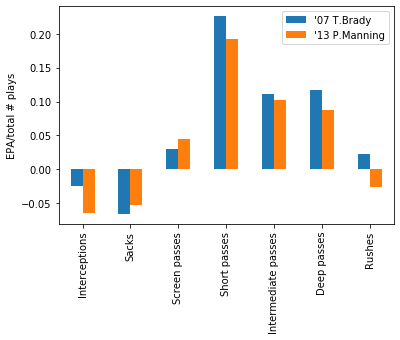

In [5]:
plot_qb_comparison(mvps)